# Banking Industry - Risk Analytics in Loan Grants

### Problem Statement

In the financial industry, it is crucial for lenders to assess the creditworthiness of borrowers before granting loans or credit. Identifying potential defaulters, who are at higher risk of failing to repay their debts, can help mitigate financial losses and maintain a healthy lending portfolio.

When the financial institution reviews a loan application, it must make a decision regarding approval, taking into account the applicant's profile. This decision involves two types of risks:

1. If the applicant is likely to repay the loan, rejecting their application results in a missed opportunity of business revenue for the company.

2. Conversely, if the applicant is highly unlikely to repay the loan, approving their application may expose the company to a potential financial loss in the event of default.

The goal of this project is to develop a predictive model that can accurately classify borrowers as defaulters or non-defaulters based on various financial and demographic factors.

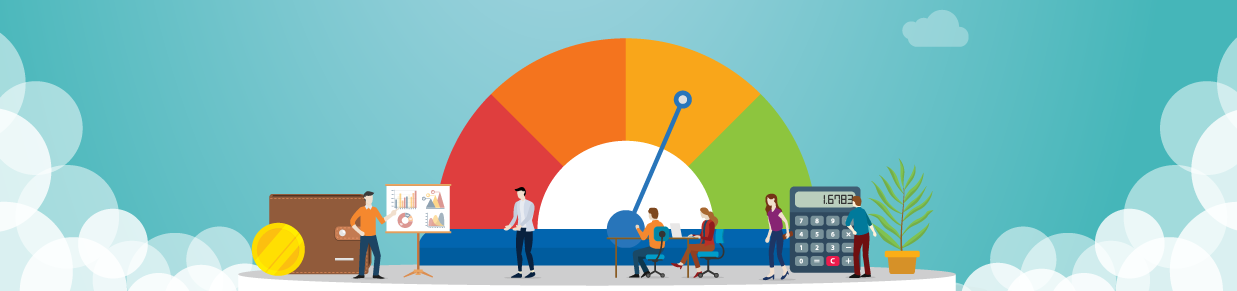

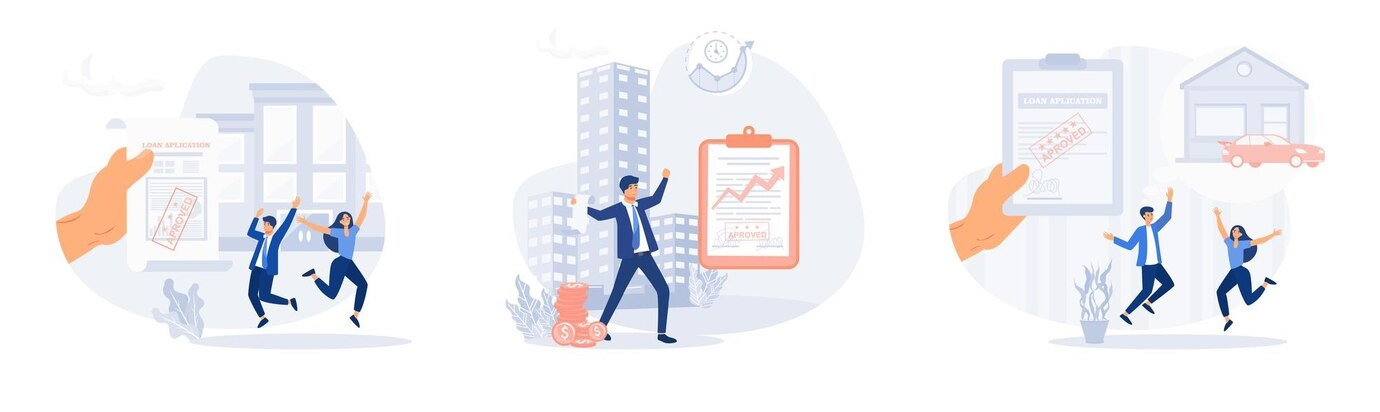

### Data Source

Source Name: Finance - Predictive Analytics (Provided by Course Programme)

Format: ‘CSV’ 

File Name: loan_data.csv Records: 5000

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

### Import The Data

In [2]:
file_path = 'loan_data.csv'
df = pd.read_csv(file_path)
df.head()

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,5/4/2018,23/4/2018,24/4/2018,14/8/2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30/12/2022,31/12/2022,12/1/2023,5/4/2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15/11/2019,18/11/2019,27/11/2019,24/2/2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25/8/2021,8/9/2021,11/9/2021,25/2/2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,2/9/2020,7/9/2020,11/9/2020,29/12/2020,False


### Data Summary Statistics

In [3]:
df.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


### Data Types and Check For Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

### Visualisation - Gender

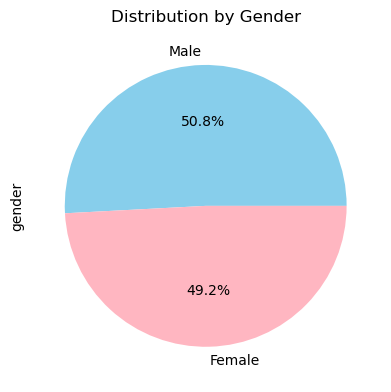

In [5]:
fig = plt.figure(figsize=(10,6))
plt.subplot(121)
df["gender"].value_counts().plot.pie(autopct="%1.1f%%", colors = ["skyblue", "lightpink"])
plt.title("Distribution by Gender")
plt.show()

### Number of Defaulters vs Non-defaulters

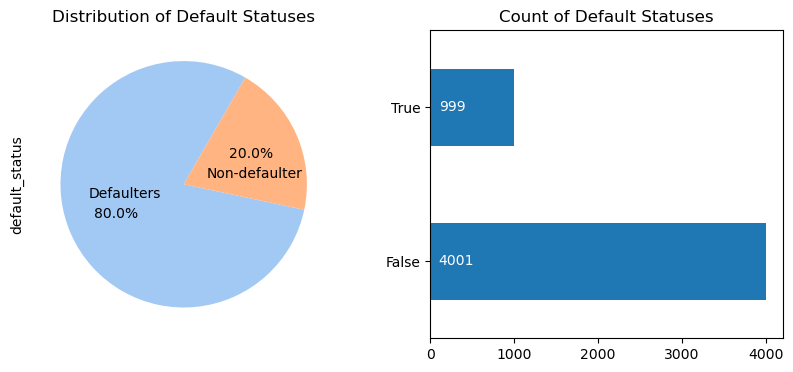

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(121)
df["default_status"].value_counts().plot.pie(autopct = "%1.1f%%",colors = sns.color_palette("pastel",7),startangle = 60,labels=["Defaulters","Non-defaulter"], labeldistance=0.2)
plt.title("Distribution of Default Statuses")

plt.subplot(122)
ax = df["default_status"].value_counts().plot(kind="barh")

for i,j in enumerate(df["default_status"].value_counts().values):
    ax.text(100,i,j,color="white", va="center", fontsize=10)

plt.title("Count of Default Statuses")
plt.show()

### Loan Types

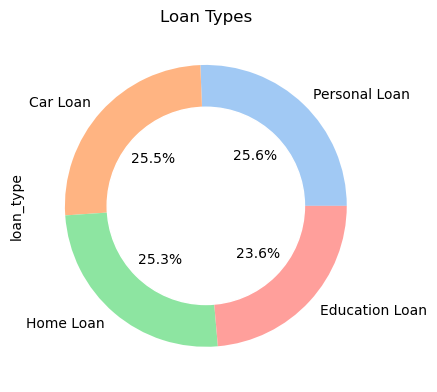

In [7]:
plt.figure(figsize=(10,6))
plt.subplot(121)
df["loan_type"].value_counts().plot.pie(autopct = "%1.1f%%",colors = sns.color_palette("pastel",7), pctdistance=0.5)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Loan Types")


plt.show()

### Loan Type by Gender

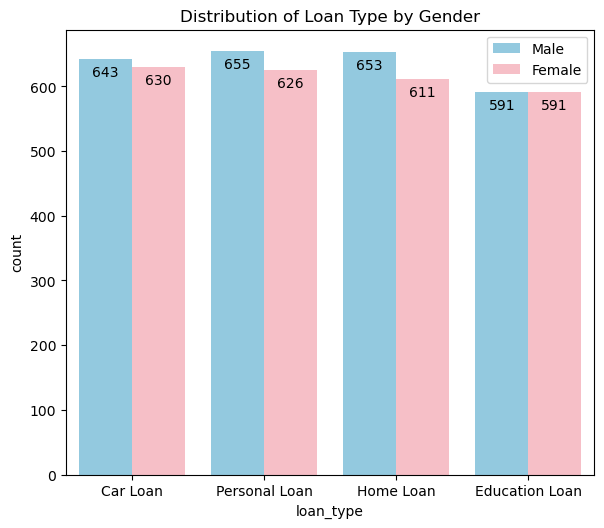

In [8]:
fig  = plt.figure(figsize=(15,5))
plt.subplots_adjust(top=1)
plt.subplot(121)
ax = sns.countplot(x = "loan_type", hue="gender", data = df ,palette=["skyblue", "lightpink"])
ax.set_facecolor("white")
ax.set_title("Distribution of Loan Type by Gender")
ax.legend(loc="upper right")

# for i,j in enumerate(df["loan_type"].value_counts().values):
#     ax.text(0.2,i,j,color="black", va="center", fontsize=10)

for p in ax.patches:
    gap = 10
    ax.annotate(
        f"{int(p.get_height())}",  # The text label (count)
        (p.get_x() + p.get_width() / 2, p.get_height() - gap),  # Position (x, y)
        ha="center",  # Horizontal alignment
        va="top",  # Vertical alignment
        fontsize=10,
    )

plt.show()

### Distribution of Default Status by Gender

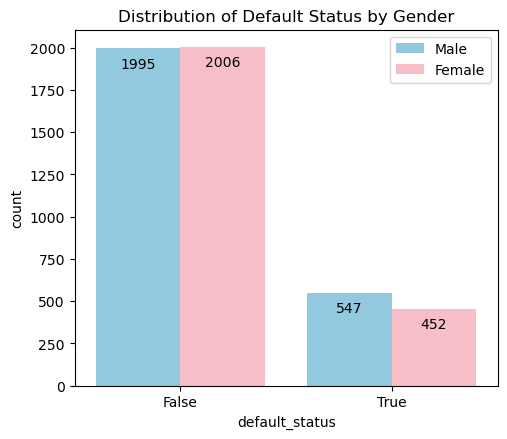

In [9]:
fig  = plt.figure(figsize=(12,4))
plt.subplots_adjust(top=1)
plt.subplot(121)
ax = sns.countplot(x = "default_status", hue="gender", data = df ,palette=["skyblue", "lightpink"])
ax.set_facecolor("white")
ax.set_title("Distribution of Default Status by Gender")
ax.legend(loc="upper right")

# for i,j in enumerate(df["loan_type"].value_counts().values):
#     ax.text(0.2,i,j,color="black", va="center", fontsize=10)

for p in ax.patches:
    gap = 50
    ax.annotate(
        f"{int(p.get_height())}",  # The text label (count)
        (p.get_x() + p.get_width() / 2, p.get_height() - gap),  # Position (x, y)
        ha="center",  # Horizontal alignment
        va="top",  # Vertical alignment
        fontsize=10,
    )

plt.show()

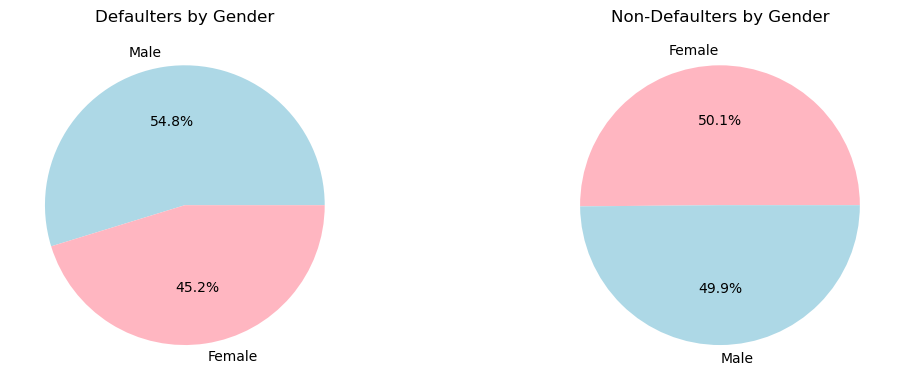

In [10]:
# Calculate the counts of defaulters and non-defaulters by gender
defaulters = df[df['default_status'] == True]['gender'].value_counts()
non_defaulters = df[df['default_status'] == False]['gender'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first pie chart for defaulters
axes[0].pie(defaulters, labels=defaulters.index, autopct='%1.1f%%', colors=["lightblue", "lightpink"])
axes[0].set_title('Defaulters by Gender')

# Plot the second pie chart for non-defaulters
axes[1].pie(non_defaulters, labels=non_defaulters.index, autopct='%1.1f%%', colors=["lightpink", "lightblue"])
axes[1].set_title('Non-Defaulters by Gender')

plt.tight_layout()

# Show the pie charts
plt.show()

### Distribution of Income Level by Default Status

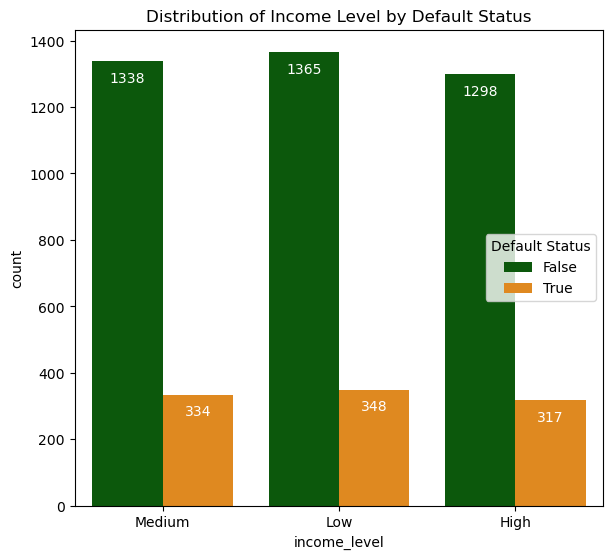

In [11]:
fig  = plt.figure(figsize=(15,4))
plt.subplots_adjust(top=1.3)
plt.subplot(121)
ax = sns.countplot(x = "income_level", hue="default_status", data = df ,palette=["darkgreen", "darkorange"])
ax.set_facecolor("white")
ax.set_title("Distribution of Income Level by Default Status")
ax.legend(loc="center right", title="Default Status")

# for i,j in enumerate(df["loan_type"].value_counts().values):
#     ax.text(0.2,i,j,color="black", va="center", fontsize=10)

for p in ax.patches:
    gap = 50
    ax.annotate(
        f"{int(p.get_height())}",  # The text label (count)
        (p.get_x() + p.get_width() / 2, p.get_height() - gap),  # Position (x, y)
        ha="center",  # Horizontal alignment
        va="center",  # Vertical alignment
        fontsize=10,
        color="white"
    )

plt.show()

### Compare Data by Defaulter and Non-defaulter

In [12]:
df.head()

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,5/4/2018,23/4/2018,24/4/2018,14/8/2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30/12/2022,31/12/2022,12/1/2023,5/4/2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15/11/2019,18/11/2019,27/11/2019,24/2/2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25/8/2021,8/9/2021,11/9/2021,25/2/2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,2/9/2020,7/9/2020,11/9/2020,29/12/2020,False


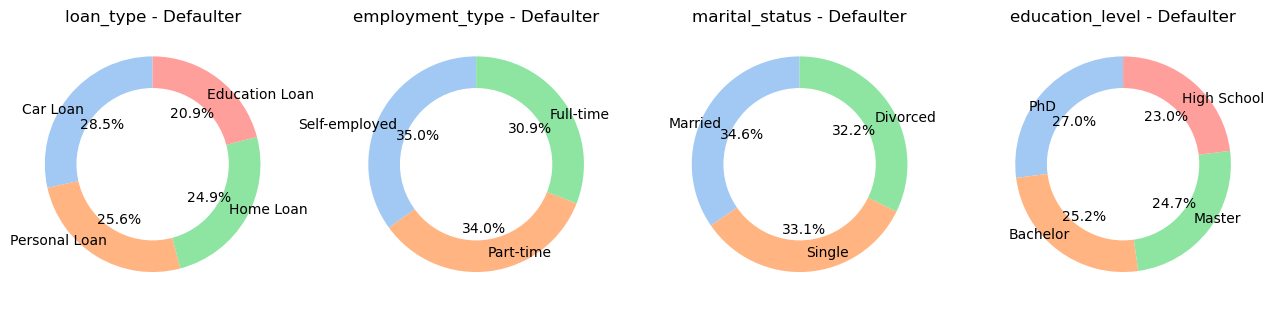

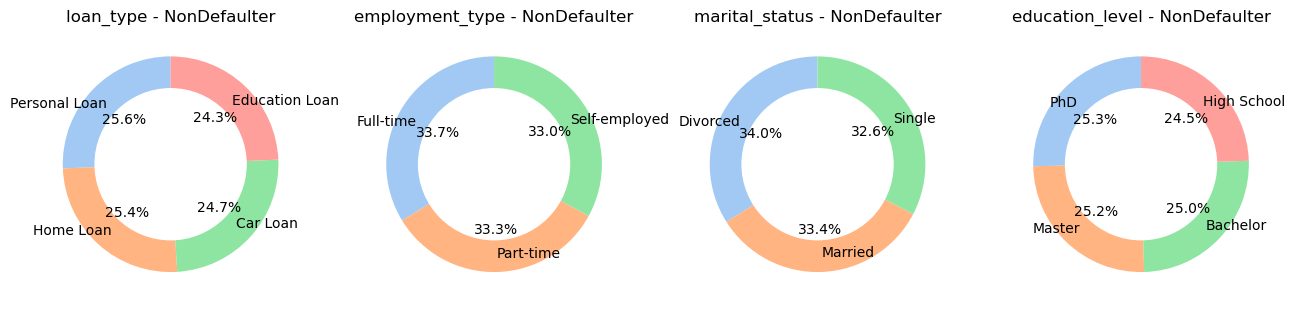

In [13]:
Defaulter = df[df['default_status']== True][[ 'loan_type', 'employment_type', 'marital_status', 'education_level']]
NonDefaulter = df[df['default_status']== False][[ 'loan_type', 'employment_type', 'marital_status', 'education_level']]

d_cols = ['loan_type', 'employment_type', 'marital_status', 'education_level']
d_length = len(d_cols)

# # Check the content of Defaulters and NonDefaulters dataframes
# print(df['default_status'].unique())
# print(df.head())
# print(Defaulter.head())
# print(NonDefaulter.head())

# Add plt.show() to display the plots
plt.show()

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    values = Defaulter[i].value_counts()
    labels = values.index
    values.plot.pie(labels=labels, autopct = "%1.1f%%",colors = sns.color_palette("pastel"),startangle = 90, labeldistance = 0.82)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+" - Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    values = NonDefaulter[i].value_counts()
    labels = values.index
    values.plot.pie(labels=labels, autopct = "%1.1f%%",colors = sns.color_palette("pastel"),startangle = 90, labeldistance = 0.82)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+" - NonDefaulter")

### Percentage of Default Status by Loan Term

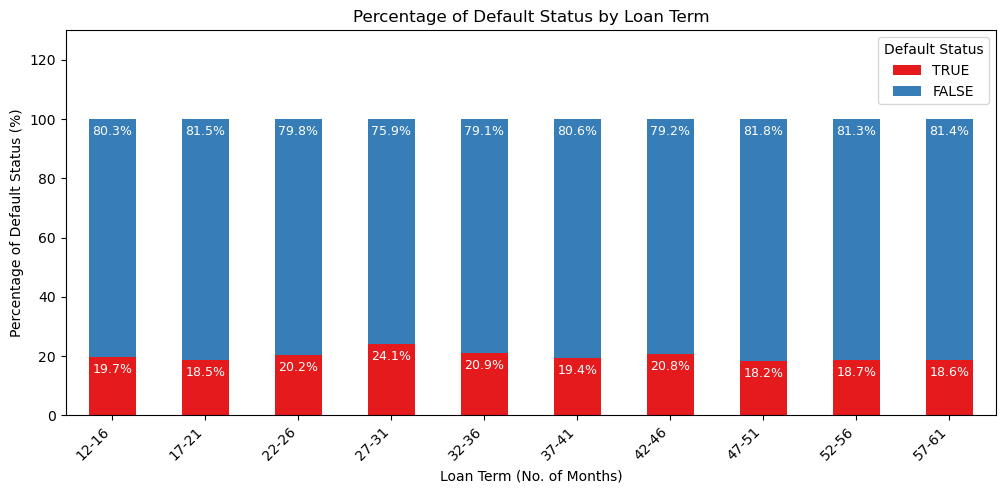

In [14]:
# Find the minimum and maximum values of 'loan_term' to determine bin boundaries
min_loan_term = df['loan_term'].min()
max_loan_term = df['loan_term'].max()

# Calculate bin edges and labels with intervals of 5
bin_interval = 5
bin_edges = range(int(min_loan_term), int(max_loan_term) + bin_interval, bin_interval)
bin_labels = [f'{int(start)}-{int(start + bin_interval - 1)}' for start in bin_edges[:-1]] 

df['loan_term_bin'] = pd.cut(df['loan_term'], bins=bin_edges, labels=bin_labels, right=False)

# Calculate the proportion of 'default_status' with value 'FALSE' in each bin
bin_counts = df.groupby('loan_term_bin')['default_status'].value_counts(normalize=True).unstack().fillna(0)
# bin_counts = bin_counts.rename(columns={False: 'Proportion of FALSE'})
bin_counts = bin_counts.rename(columns={True: 'Percentage of TRUE', False: 'Percentage of FALSE'})

# Convert proportions to percentages
bin_counts['Percentage of FALSE'] = bin_counts['Percentage of FALSE'] * 100
bin_counts['Percentage of TRUE'] = bin_counts['Percentage of TRUE'] * 100

custom_palette = sns.color_palette("Set1")

# Create a bar chart
ax = bin_counts[['Percentage of TRUE', 'Percentage of FALSE']].plot(kind='bar', stacked=True, figsize=(12, 5), color = custom_palette)

# Add labels and title
plt.xlabel('Loan Term (No. of Months)')
plt.ylabel('Percentage of Default Status (%)')
plt.title('Percentage of Default Status by Loan Term')

# Set the x-axis labels to the bin labels and rotate them 45 degrees
ax.set_xticklabels(bin_labels, rotation=45, ha='right')

# Add percentage labels on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height - 2), va="top", ha='center', color="white", fontsize=9)

# # Add a margin on top of the bars to prevent legend overlap
ax.set_ylim(top=130)

# Show the plot
plt.legend(title='Default Status', labels=['TRUE','FALSE'])
plt.show()

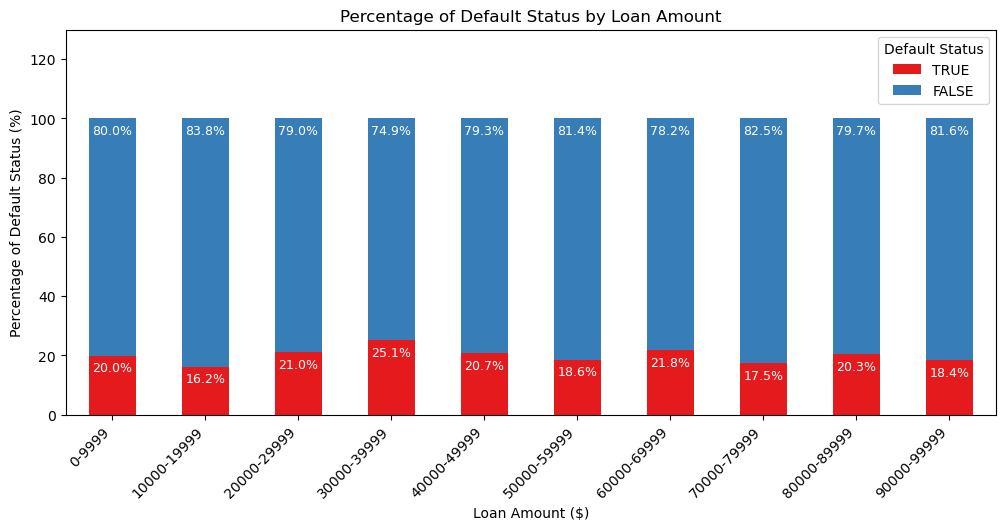

In [15]:
# Find the minimum and maximum values of 'loan_term' to determine bin boundaries
min_loan_amount = 0
max_loan_amount = 100000

# Calculate bin edges and labels with intervals of 10000
bin_interval = 10000
bin_edges = range(int(min_loan_amount), int(max_loan_amount) + bin_interval, bin_interval)
bin_labels = [f'{int(start)}-{int(start + bin_interval - 1)}' for start in bin_edges[:-1]] 

df['loan_amount_bin'] = pd.cut(df['loan_amount'], bins=bin_edges, labels=bin_labels, right=False)

# Calculate the proportion of 'default_status' with value 'FALSE' in each bin
bin_counts = df.groupby('loan_amount_bin')['default_status'].value_counts(normalize=True).unstack().fillna(0)
# bin_counts = bin_counts.rename(columns={False: 'Proportion of FALSE'})
bin_counts = bin_counts.rename(columns={True: 'Percentage of TRUE', False: 'Percentage of FALSE'})

# Convert proportions to percentages
bin_counts['Percentage of FALSE'] = bin_counts['Percentage of FALSE'] * 100
bin_counts['Percentage of TRUE'] = bin_counts['Percentage of TRUE'] * 100

custom_palette = sns.color_palette("Set1")

# Create a bar chart
ax = bin_counts[['Percentage of TRUE', 'Percentage of FALSE']].plot(kind='bar', stacked=True, figsize=(12, 5), color = custom_palette)

# Add labels and title
plt.xlabel('Loan Amount ($)')
plt.ylabel('Percentage of Default Status (%)')
plt.title('Percentage of Default Status by Loan Amount')

# Set the x-axis labels to the bin labels and rotate them 45 degrees
ax.set_xticklabels(bin_labels, rotation=45, ha='right')

# Add percentage labels on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height - 2), va="top", ha='center', color="white", fontsize=9)

# # Add a margin on top of the bars to prevent legend overlap
ax.set_ylim(top=130)

# Show the plot
plt.legend(title='Default Status', labels=['TRUE','FALSE'])
plt.show()

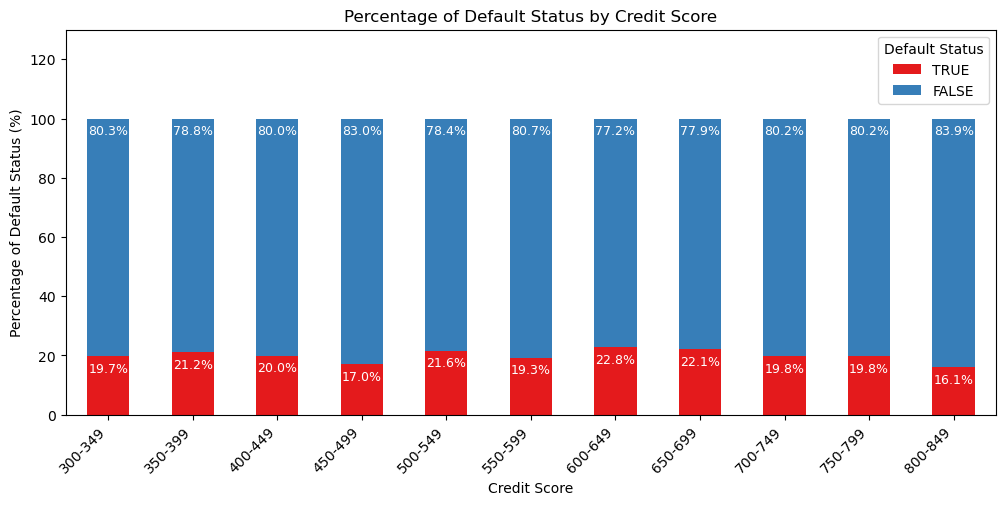

In [16]:
# Find the minimum and maximum values of 'loan_term' to determine bin boundaries
min_credit_score = df['credit_score'].min()
max_credit_score = df['credit_score'].max()

# Calculate bin edges and labels with intervals of 5
bin_interval = 50
bin_edges = range(int(min_credit_score), int(max_credit_score) + bin_interval, bin_interval)
bin_labels = [f'{int(start)}-{int(start + bin_interval - 1)}' for start in bin_edges[:-1]] 

df['credit_score_bin'] = pd.cut(df['credit_score'], bins=bin_edges, labels=bin_labels, right=False)

# Calculate the proportion of 'default_status' with value 'FALSE' in each bin
bin_counts = df.groupby('credit_score_bin')['default_status'].value_counts(normalize=True).unstack().fillna(0)
# bin_counts = bin_counts.rename(columns={False: 'Proportion of FALSE'})
bin_counts = bin_counts.rename(columns={True: 'Percentage of TRUE', False: 'Percentage of FALSE'})

# Convert proportions to percentages
bin_counts['Percentage of FALSE'] = bin_counts['Percentage of FALSE'] * 100
bin_counts['Percentage of TRUE'] = bin_counts['Percentage of TRUE'] * 100

custom_palette = sns.color_palette("Set1")

# Create a bar chart
ax = bin_counts[['Percentage of TRUE', 'Percentage of FALSE']].plot(kind='bar', stacked=True, figsize=(12, 5), color=custom_palette)

# Add labels and title
plt.xlabel('Credit Score')
plt.ylabel('Percentage of Default Status (%)')
plt.title('Percentage of Default Status by Credit Score')

# Set the x-axis labels to the bin labels and rotate them 45 degrees
ax.set_xticklabels(bin_labels, rotation=45, ha='right')

# Add percentage labels on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height - 2), va="top", ha='center', color="white", fontsize=9)

# # Add a margin on top of the bars to prevent legend overlap
ax.set_ylim(top=130)

# Show the plot
plt.legend(title='Default Status', labels=['TRUE','FALSE'])
plt.show()

### Relationship Between Loan Amount & Interest Rate

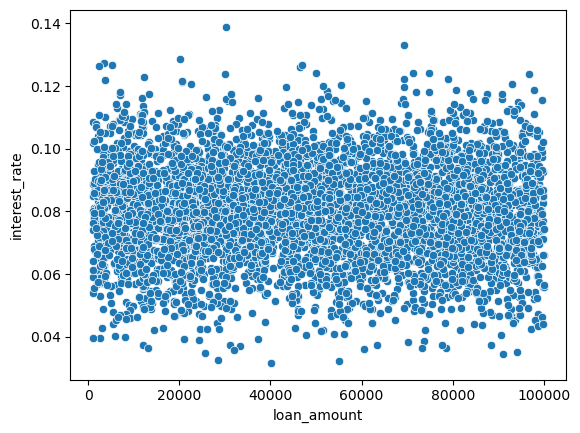

In [17]:
sns.scatterplot(x='loan_amount',y='interest_rate', data=df);

In [18]:
correlation = df['loan_amount'].corr(df['interest_rate'])

print(f"Correlation between interest_rate and loan_amount: {correlation}")

Correlation between interest_rate and loan_amount: -0.01731705551584699


### Heatmap Visual

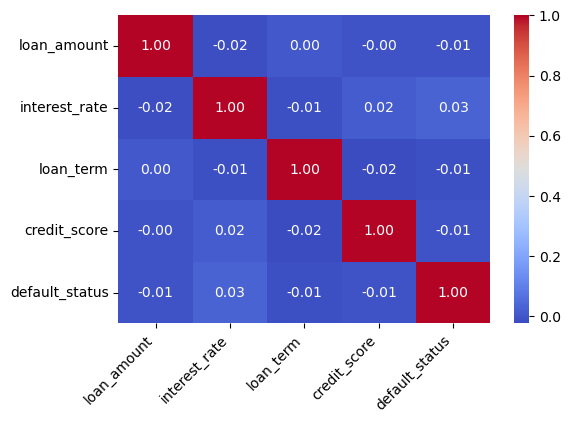

In [19]:
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(6, 4)) 
sns.heatmap(corrmat, ax = ax, cmap ="coolwarm", annot=True, fmt=".2f")

# Set the x-axis labels to the bin labels and rotate them 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

### Split and Train Model

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report

In [21]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customer_id        5000 non-null   object  
 1   loan_id            5000 non-null   object  
 2   loan_type          5000 non-null   object  
 3   loan_amount        5000 non-null   int64   
 4   interest_rate      5000 non-null   float64 
 5   loan_term          5000 non-null   int64   
 6   employment_type    5000 non-null   object  
 7   income_level       5000 non-null   object  
 8   credit_score       5000 non-null   int64   
 9   gender             5000 non-null   object  
 10  marital_status     5000 non-null   object  
 11  education_level    5000 non-null   object  
 12  application_date   5000 non-null   object  
 13  approval_date      5000 non-null   object  
 14  disbursement_date  5000 non-null   object  
 15  due_date           5000 non-null   object  
 16  defaul

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status,loan_term_bin,loan_amount_bin,credit_score_bin
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,5/4/2018,23/4/2018,24/4/2018,14/8/2018,False,12-16,10000-19999,800-849
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30/12/2022,31/12/2022,12/1/2023,5/4/2023,False,52-56,0-9999,750-799
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15/11/2019,18/11/2019,27/11/2019,24/2/2020,False,47-51,70000-79999,650-699
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25/8/2021,8/9/2021,11/9/2021,25/2/2022,False,27-31,50000-59999,750-799
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,2/9/2020,7/9/2020,11/9/2020,29/12/2020,False,47-51,0-9999,500-549


In [22]:
# drop the bin columns used for visualisations
df.drop('loan_term_bin', axis=1, inplace=True)
df.drop('loan_amount_bin', axis=1, inplace=True)
df.drop('credit_score_bin', axis=1, inplace=True)

# drop the date columns
df.drop('application_date', axis=1, inplace=True)
df.drop('approval_date', axis=1, inplace=True)
df.drop('disbursement_date', axis=1, inplace=True)
df.drop('due_date', axis=1, inplace=True)

# drop columns such as customer_id and loan_id which are abritrary
df.drop('customer_id', axis=1, inplace=True)
df.drop('loan_id', axis=1, inplace=True)

In [23]:
# Encoding the data - Before training the model, we need to make sure the data is in a form that the model can understand
# Use Label Encoder for all features with 2 classes
le = LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
    print(x, df[x].unique())
    df[x]= le.fit_transform(df[x])

gender ['Male' 'Female']
default_status [False  True]


In [24]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_type        5000 non-null   object 
 1   loan_amount      5000 non-null   int64  
 2   interest_rate    5000 non-null   float64
 3   loan_term        5000 non-null   int64  
 4   employment_type  5000 non-null   object 
 5   income_level     5000 non-null   object 
 6   credit_score     5000 non-null   int64  
 7   gender           5000 non-null   int32  
 8   marital_status   5000 non-null   object 
 9   education_level  5000 non-null   object 
 10  default_status   5000 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 410.3+ KB


,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,Car Loan,16795,0.051852,15,Self-employed,Medium,833,1,Single,Master,0
1,Personal Loan,1860,0.089296,56,Full-time,Medium,776,0,Married,Bachelor,0
2,Personal Loan,77820,0.070470,51,Full-time,Low,697,1,Divorced,High School,0
3,Car Loan,55886,0.062155,30,Full-time,Low,795,0,Married,PhD,0
4,Home Loan,7265,0.070635,48,Part-time,Low,519,0,Married,High School,0


In [25]:
# Encode variables with more than 2 Classes
df = pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

In [26]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   loan_amount                    5000 non-null   int64  
 1   interest_rate                  5000 non-null   float64
 2   loan_term                      5000 non-null   int64  
 3   credit_score                   5000 non-null   int64  
 4   gender                         5000 non-null   int32  
 5   default_status                 5000 non-null   int64  
 6   loan_type_Education Loan       5000 non-null   uint8  
 7   loan_type_Home Loan            5000 non-null   uint8  
 8   loan_type_Personal Loan        5000 non-null   uint8  
 9   employment_type_Part-time      5000 non-null   uint8  
 10  employment_type_Self-employed  5000 non-null   uint8  
 11  income_level_Low               5000 non-null   uint8  
 12  income_level_Medium            5000 non-null   u

,loan_amount,interest_rate,loan_term,credit_score,gender,default_status,loan_type_Education Loan,loan_type_Home Loan,loan_type_Personal Loan,employment_type_Part-time,employment_type_Self-employed,income_level_Low,income_level_Medium,marital_status_Married,marital_status_Single,education_level_High School,education_level_Master,education_level_PhD
0,16795,0.051852,15,833,1,0,0,0,0,0,1,0,1,0,1,0,1,0
1,1860,0.089296,56,776,0,0,0,0,1,0,0,0,1,1,0,0,0,0
2,77820,0.070470,51,697,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,55886,0.062155,30,795,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,7265,0.070635,48,519,0,0,0,1,0,1,0,1,0,1,0,1,0,0


In [27]:
X=df.drop('default_status',axis=1)
y=df['default_status']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Initialize and Train 1st Machine Learning Model - Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
# Create and train the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Make predictions on the test set
log_y_pred = log_model.predict(X_test)

In [35]:
# Evaluate the accuracy of the model
logAccuracy = accuracy_score(y_test, log_y_pred)
print("The accuracy of Logistic Regression is:", logAccuracy*100, "%")
# print("Accuracy:", accuracy)

The accuracy of Logistic Regression is: 80.72 %


In [37]:
# Generate a confusion matrix and classification report
log_confusion = confusion_matrix(y_test, log_y_pred)
log_classification_rep = classification_report(y_test, log_y_pred)

print("Confusion Matrix:")
print(log_confusion)

print("\nClassification Report:")
print(log_classification_rep)

Confusion Matrix:
[[1009    0]
 [ 241    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250



Text(50.722222222222214, 0.5, 'Predicted')

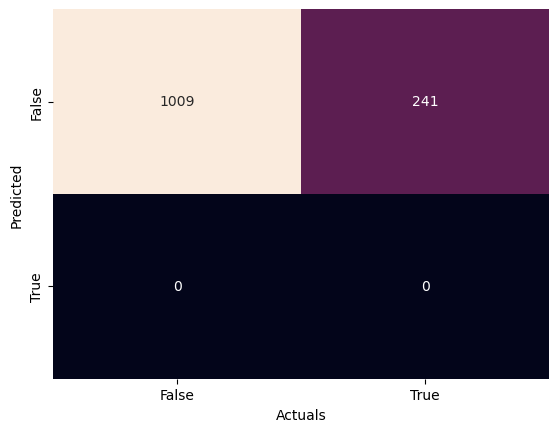

In [38]:
sns.heatmap(log_confusion.T, annot=True, fmt='d', cbar=False,
          xticklabels=['False','True'],
          yticklabels=['False','True'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

### Initialize and Train 2nd Machine Learning Model - Random Forest

In [39]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

### Predict and Evaluate the model

In [40]:
y_pred = rf_classifier.predict(X_test)

In [41]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250



In [42]:
print(y_train)

4154    0
4820    0
1202    0
3759    0
622     0
       ..
4931    1
3264    1
1653    0
2607    0
2732    1
Name: default_status, Length: 3750, dtype: int64


Text(50.722222222222214, 0.5, 'Predicted')

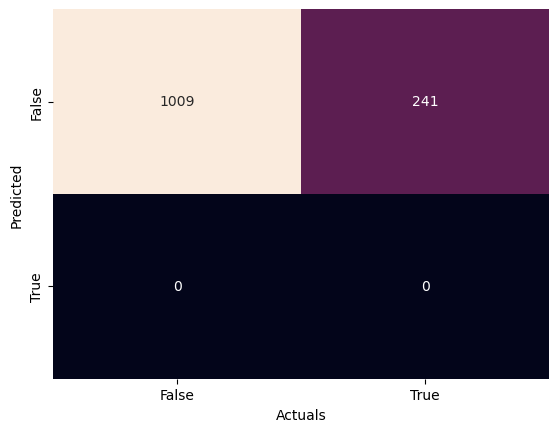

In [43]:
## Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
          xticklabels=['False','True'],
          yticklabels=['False','True'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

### Resampling Techniques to Solve Class Imbalance

In [44]:
# class count
class_count_0, class_count_1 = df['default_status'].value_counts()

# Separate class
class_0 = df[df['default_status'] == 0]
class_1 = df[df['default_status'] == 1] # print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4001, 18)
class 1: (999, 18)


In [45]:
class_0.head()

,loan_amount,interest_rate,loan_term,credit_score,gender,default_status,loan_type_Education Loan,loan_type_Home Loan,loan_type_Personal Loan,employment_type_Part-time,employment_type_Self-employed,income_level_Low,income_level_Medium,marital_status_Married,marital_status_Single,education_level_High School,education_level_Master,education_level_PhD
0,16795,0.051852,15,833,1,0,0,0,0,0,1,0,1,0,1,0,1,0
1,1860,0.089296,56,776,0,0,0,0,1,0,0,0,1,1,0,0,0,0
2,77820,0.070470,51,697,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,55886,0.062155,30,795,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,7265,0.070635,48,519,0,0,0,1,0,1,0,1,0,1,0,1,0,0


In [46]:
class_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4001 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   loan_amount                    4001 non-null   int64  
 1   interest_rate                  4001 non-null   float64
 2   loan_term                      4001 non-null   int64  
 3   credit_score                   4001 non-null   int64  
 4   gender                         4001 non-null   int32  
 5   default_status                 4001 non-null   int64  
 6   loan_type_Education Loan       4001 non-null   uint8  
 7   loan_type_Home Loan            4001 non-null   uint8  
 8   loan_type_Personal Loan        4001 non-null   uint8  
 9   employment_type_Part-time      4001 non-null   uint8  
 10  employment_type_Self-employed  4001 non-null   uint8  
 11  income_level_Low               4001 non-null   uint8  
 12  income_level_Medium            4001 non-null   u

#### Random Downsampling

Downsampling is done to reduce the count of training samples falling under the majority class. It helps to even up the counts of target categories and is done until the majority and minority class is balanced out.

<Axes: title={'center': 'count (default_status)'}>

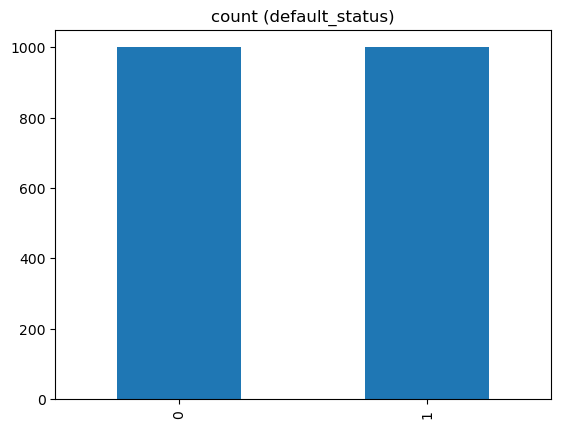

In [47]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

# print("total class of 1 and0:",test_under['default_status'].value_counts())
test_under['default_status'].value_counts().plot(kind='bar', title='count (default_status)')

In [48]:

# Separate input features (X) and target variable (y)
y = test_under["default_status"]
X = test_under.drop('default_status', axis=1)
 
# Train model
clf_2 = RandomForestClassifier(random_state=123)
clf_2.fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X)
 
# Check if our model still predicting just one class
print( np.unique( pred_y_2 ) )
# [0 1]

# Show accuracy
forestAccuracy = accuracy_score(y, pred_y_2)

print("The accuracy of Random Forest Model is:", forestAccuracy*100, "%")
 
# print( accuracy_score(y, pred_y_2) )
# # 1.0
 
# # What about AUROC?
# prob_y_2 = clf_2.predict_proba(X)
# prob_y_2 = [p[1] for p in prob_y_2]
# print( (y, prob_y_2) )
# # 1.0

[0 1]
The accuracy of Random Forest Model is: 100.0 %


Text(50.722222222222214, 0.5, 'Predicted')

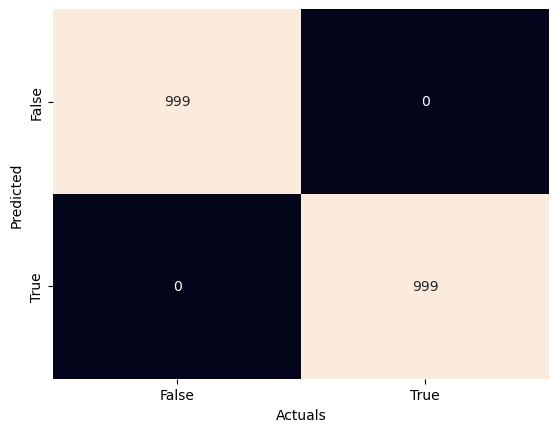

In [50]:
## Confusion Matrix After Downsampling

conf_mat = confusion_matrix(y, pred_y_2)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
          xticklabels=['False','True'],
          yticklabels=['False','True'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

### Feature Importance in the Model

In [51]:
# Creating the feature importances dataframe
feature_importance = np.array(rf_classifier.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})

<Axes: xlabel='feature_importance', ylabel='feature_names'>

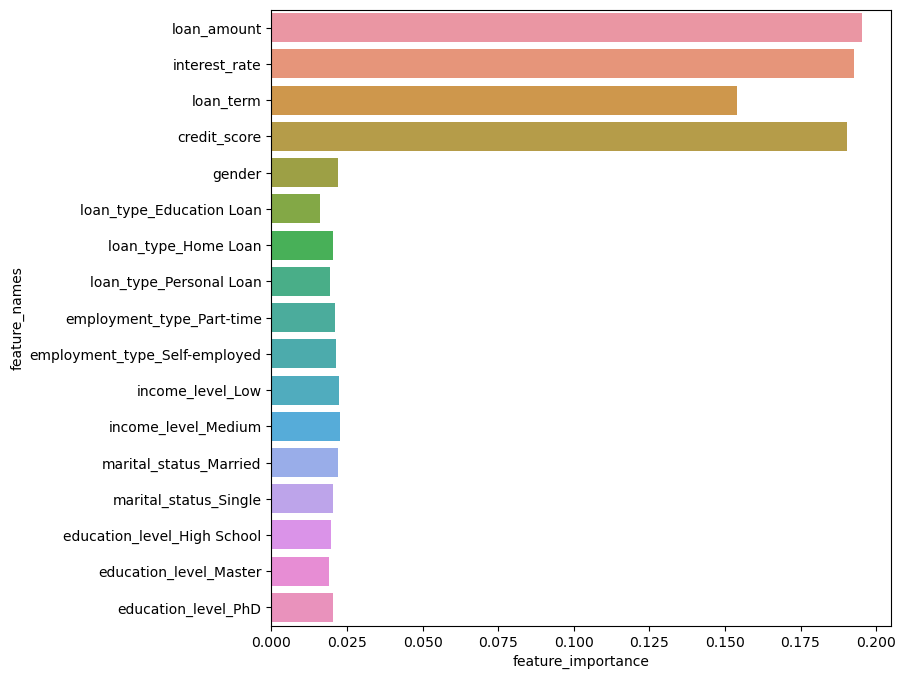

In [52]:
plt.figure(figsize=(8,8))
sns.barplot(x=feat_imp['feature_importance'], y=feat_imp['feature_names'])

## Recommendations

We can see the factors influencing the prediction of defaulters are mainly loan amount, interest rate, loan term and credit score.

Based on that, we can consider doing some risk segmentation by grouping customers into different risk groups focusing on these 4 factors.

With these insights, they can also help in improving our current credit score models. We might want to fine-tune our credit scoring algorithm to place more weight to these key factors when assessing the creditworthiness of applicants in future.

We can also further increase the sample size of defaulters to further make the ML model more robust or experiment with other ways to fine-tune our ML model.

For clients who fall under higher risk groups, we can either:
- deny their loan application
- limit the amount loaned to them
- require higher collateral on the loans approved to them
- conduct regular reviews, continuously monitor the impact of our pricing strategy on borrower behavior and loan performance, be prepared to adjust our approach if it is not achieving the desired results
- increase their interest rates to an optimal level where the risk of default does not increase yet at the same time increases the profitability of our lending portfolio

